In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()
#print(train_data.isna().sum())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_data.drop('Id',axis=1,inplace=True)
test_data.drop('Id',axis=1,inplace=True)

In [6]:
#Performing EDA on numerical data

train_data_n = train_data[[c for c in train_data.columns if train_data[c].dtypes!='O']].copy()
test_data_n = test_data[[c for c in test_data.columns if test_data[c].dtypes!='O']].copy()


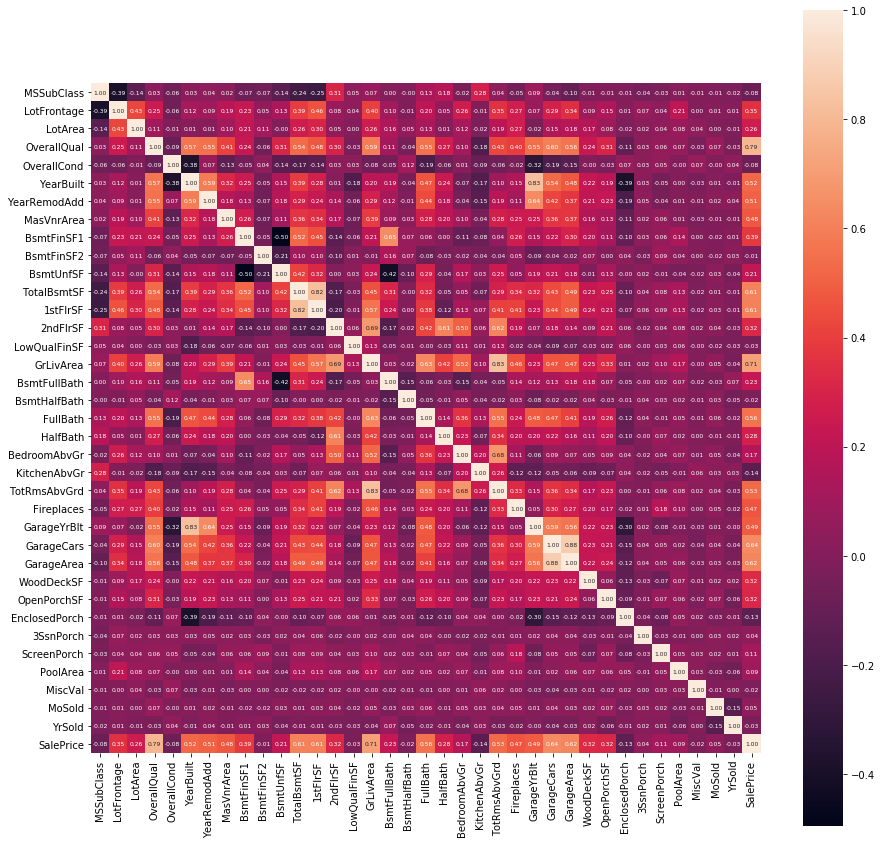

In [7]:
# Correlation Matrix
corr_mat = train_data_n.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_mat, square = True, ax = ax, annot = True, fmt = '.2f', annot_kws = {'size' : 6} )

In [8]:
# Selecting top 15 features 

#First choose top 21 features
top_15_cols = corr_mat.nlargest(15, 'SalePrice')['SalePrice'].index

#Then Removing the SalePrice column
top_14_cols = top_15_cols[1:]

print(top_14_cols)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')


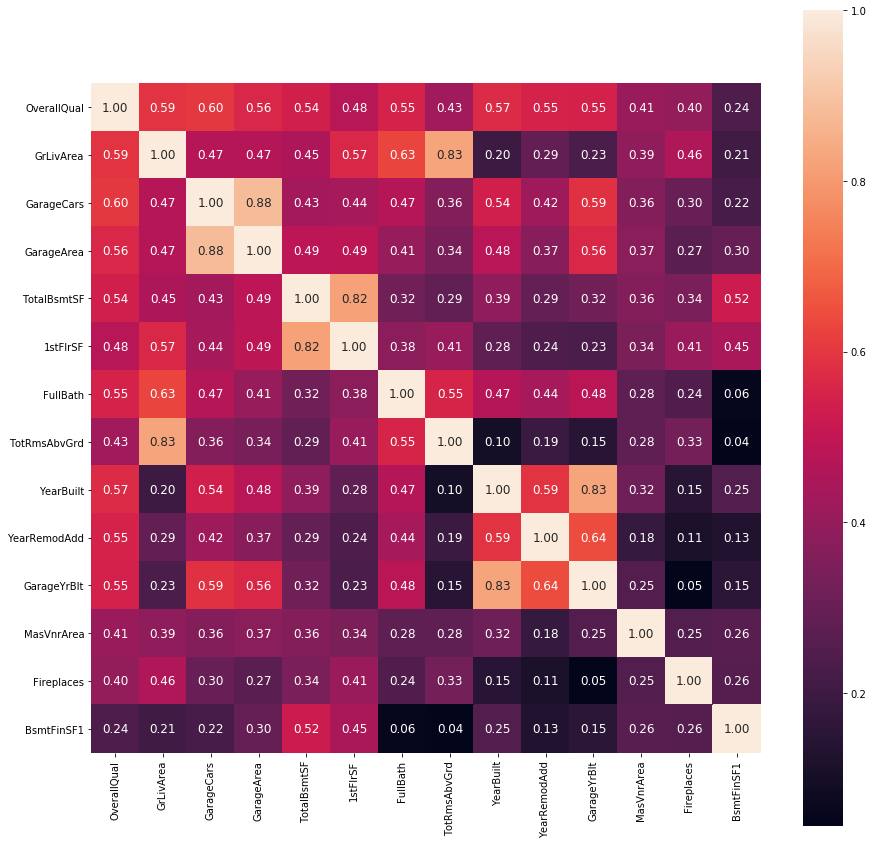

In [9]:
# Correlation Matrix for top 20 features
corr_mat_top14 = train_data_n[top_14_cols].corr() 

fig1, ax1 = plt.subplots(figsize = (15,15))
sns.heatmap(corr_mat_top14, square = True, ax = ax1, annot = True, fmt = '.2f', annot_kws = {'size' : 12} )

**High Co-linearity (>.80) found between:**
1. TotRmsAbvGrd and GrLivArea - 0.83
2. GarageArea and GarageCars - 0.88
3. 1stFlrSF and TotalBsmtSF - 0.82
4. GarageYrBlt and YearBuilt - 0.83

**Dropping one from each pairs**

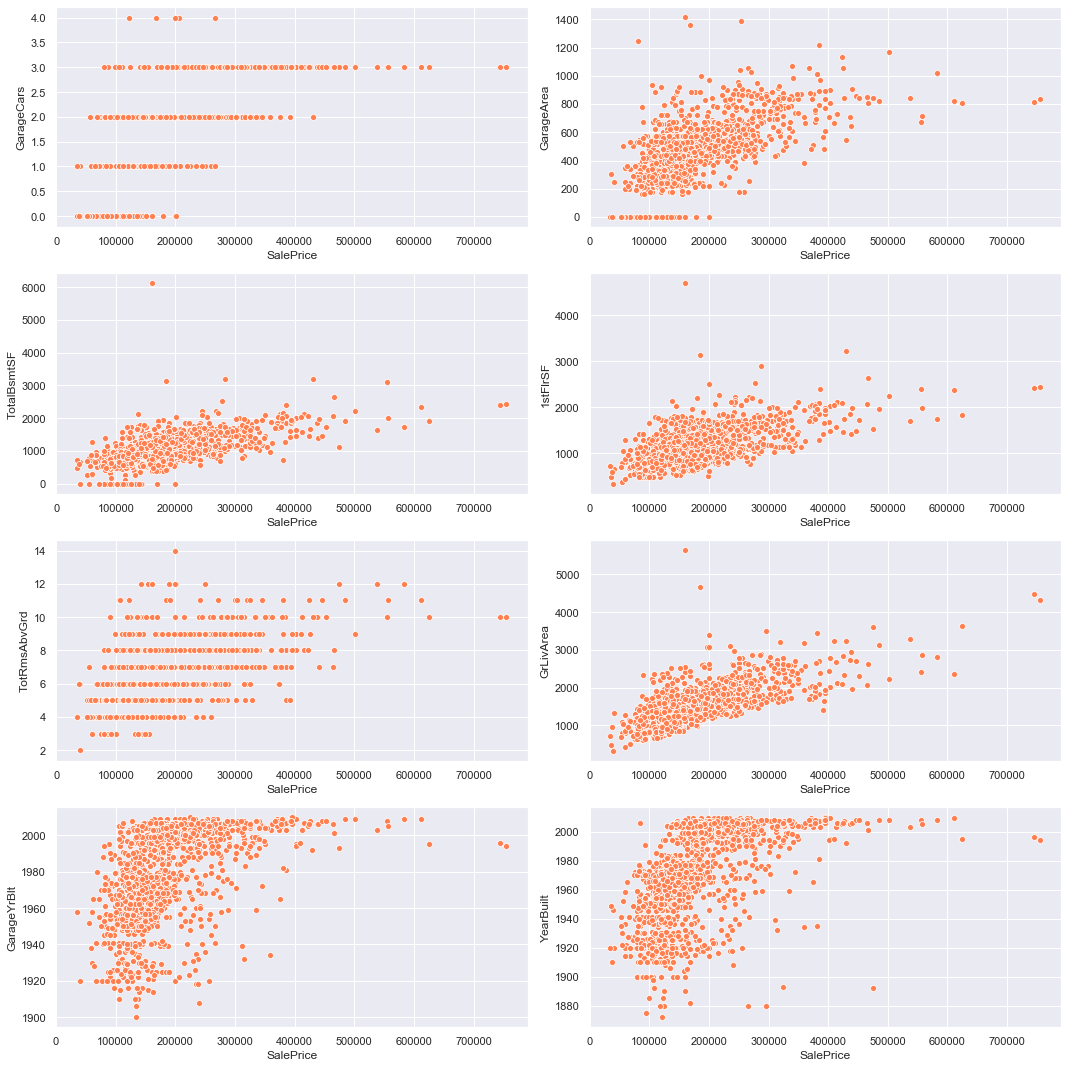

In [10]:
sns.set(style="darkgrid")

fig2,ax2=plt.subplots(4,2,figsize=(15,15))
sns.scatterplot(train_data_n['SalePrice'],train_data_n['GarageCars'],  ax=ax2[0][0],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['GarageArea'],  ax=ax2[0][1],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['TotalBsmtSF'], ax=ax2[1][0],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['1stFlrSF'],    ax=ax2[1][1],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['TotRmsAbvGrd'],ax=ax2[2][0],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['GrLivArea'],   ax=ax2[2][1],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['GarageYrBlt'], ax=ax2[3][0],color='coral')
sns.scatterplot(train_data_n['SalePrice'],train_data_n['YearBuilt'],   ax=ax2[3][1],color='coral')
fig2.tight_layout()

In [11]:
train_data_n.drop(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)
test_data_n.drop(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)

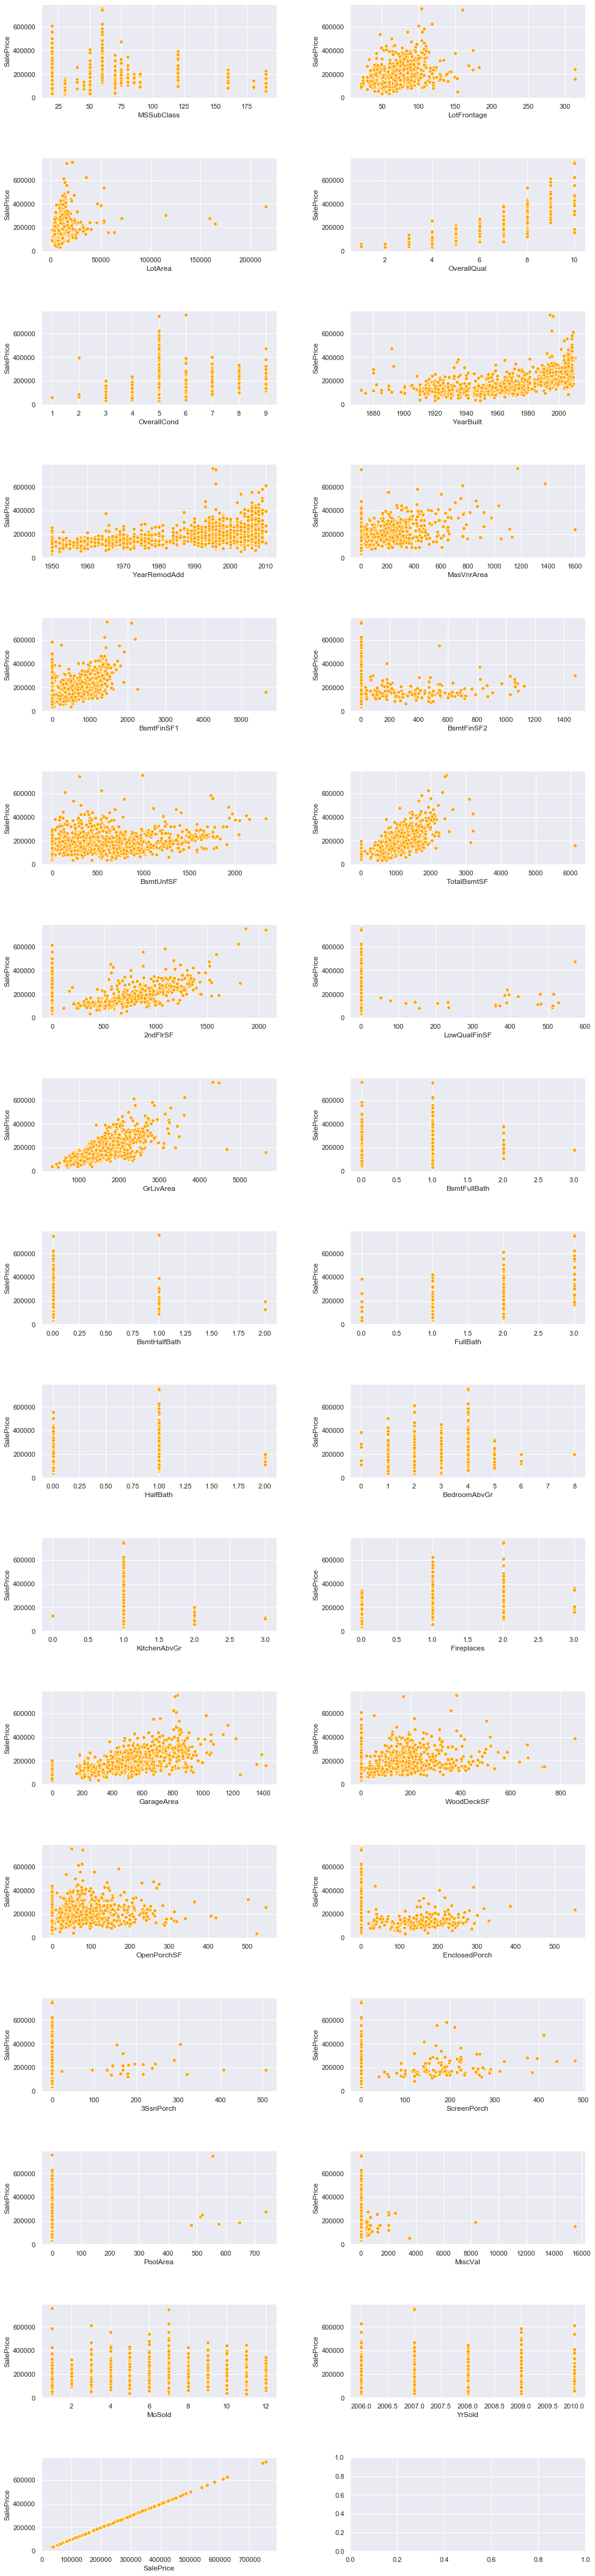

In [12]:
#Now, we will see each pair manually and remove non-linearity.

fig,ax=plt.subplots(17, 2, figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(train_data_n[x],y,color=('orange'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(train_data_n.columns):
    c=r%2
    graph(col,train_data['SalePrice'],r//2,c,col)

In [13]:
non_linear=['MSSubClass','LotArea','OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr',
            'KitchenAbvGr','Fireplaces','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','MoSold', 'YrSold']
print("total non-linear",len(non_linear)," columns")

total non-linear 17  columns


In [14]:
linear_features = np.array([col for col in train_data_n.columns if col not in non_linear])

In [15]:
print(linear_features)

['LotFrontage' 'OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '2ndFlrSF'
 'GrLivArea' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 'SalePrice']


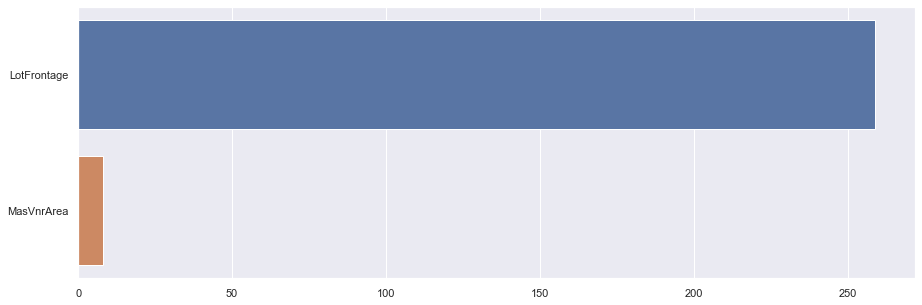

In [16]:
fig=plt.figure(figsize=(15,5))
train_null=train_data_n.isnull().sum()[train_data_n.isnull().sum()!=0]
sns.barplot(y=train_null.index,x=train_null)

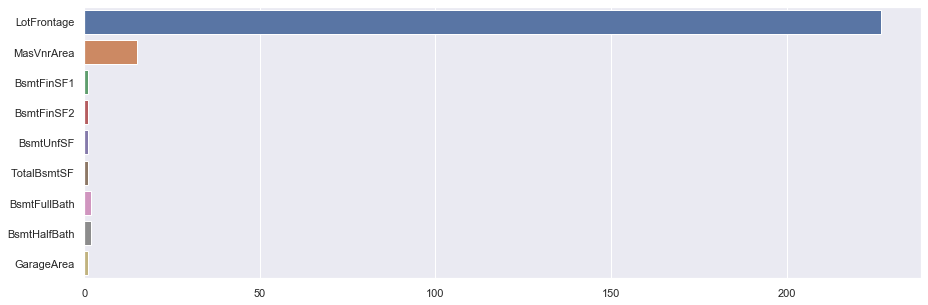

In [17]:
fig=plt.figure(figsize=(15,5))
test_null=test_data_n.isnull().sum()[test_data_n.isnull().sum()!=0]
sns.barplot(y=test_null.index,x=test_null)

In [18]:
for col in train_data_n.columns:
    train_data_n[col] = train_data_n[col].fillna(0)
for col in test_data_n.columns:
    test_data_n[col] = test_data_n[col].fillna(0)

In [19]:
print(train_data_n[linear_features].shape)
print(test_data_n[linear_features[:-1]].shape)

(1460, 16)
(1459, 15)


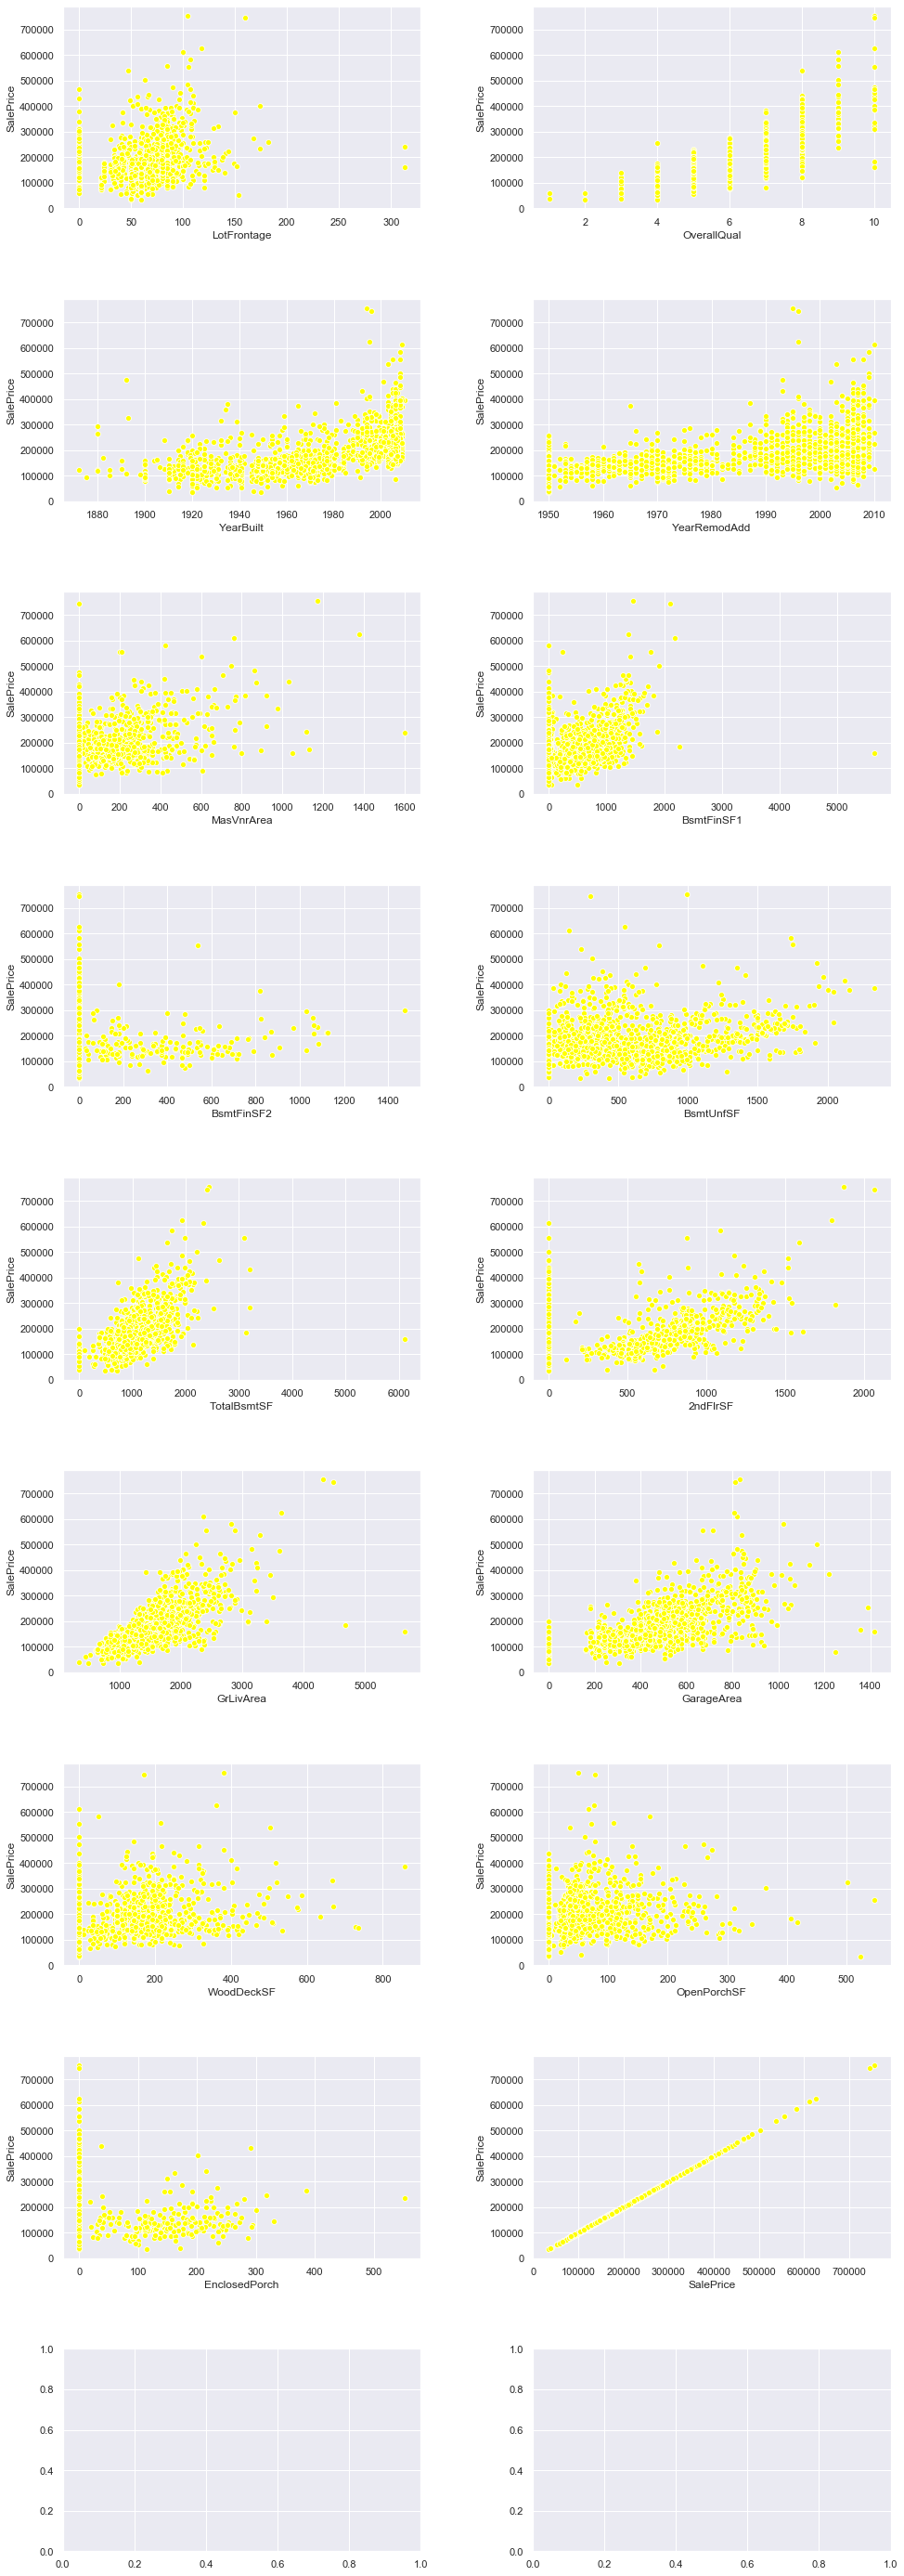

In [20]:
 fig,ax=plt.subplots(9,2,figsize=(15,40))
 def graph(x,y,r,c,title):
     sns.scatterplot(train_data_n[x],train_data_n[y],color=('yellow'),ax=ax[r][c])
     ax[r][c].set_ylabel(y)
     ax[r][c].set_xlabel(x)
     fig.tight_layout(pad=5.0)
 for r,col in enumerate(train_data_n[linear_features].columns):
     c=r%2
     graph(col,'SalePrice',r//2,c,col)

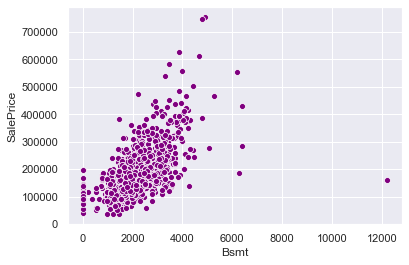

In [21]:
train_data_n['Bsmt']=train_data_n['BsmtFinSF1']+train_data_n['BsmtFinSF2']+train_data_n['BsmtUnfSF']+train_data_n['TotalBsmtSF']
test_data_n['Bsmt']=test_data_n['BsmtFinSF1']+test_data_n['BsmtFinSF2']+test_data_n['BsmtUnfSF']+test_data_n['TotalBsmtSF']

sns.scatterplot(train_data_n['Bsmt'], train_data_n['SalePrice'], color='purple')

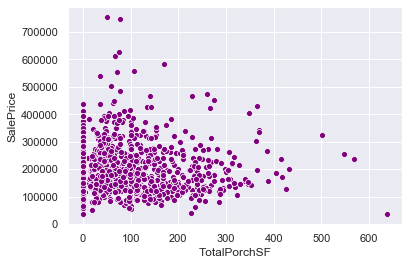

In [22]:
train_data_n['TotalPorchSF'] = train_data_n['EnclosedPorch'] + train_data_n['OpenPorchSF']
test_data_n['TotalPorchSF'] = test_data_n['EnclosedPorch'] + test_data_n['OpenPorchSF']

sns.scatterplot(train_data_n['TotalPorchSF'], train_data_n['SalePrice'], color='purple')

In [23]:
linear_features

array(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice'], dtype='<U13')

In [24]:
linear_features=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea','Bsmt', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

In [25]:
#Removing Outliers

a=train_data_n['LotFrontage'].sort_values(ascending=False).head(2)
b=train_data_n['MasVnrArea'].sort_values(ascending=False).head(2)
c=train_data_n['Bsmt'].sort_values(ascending=False).head(1)
d=train_data_n['GrLivArea'].sort_values(ascending=False).head(2)
e=train_data_n['GarageArea'].sort_values(ascending=False).head(3)
f=train_data_n['SalePrice'].sort_values(ascending=False).head(2)

In [26]:
index=a.index
index=index.append(b.index)
index=index.append(c.index)
index=index.append(d.index)
index=index.append(e.index)
index=index.append(f.index)

In [27]:
train_data_n=train_data_n.drop(index).reset_index(drop=True)

In [28]:
print(train_data_n.shape)
print(train_data_n[linear_features].shape)

(1451, 35)
(1451, 12)


In [29]:
Train_X_n = train_data_n[linear_features]
Train_Y_n = train_data_n['SalePrice']

In [30]:
# Scaling the features

scaler = RobustScaler()

final_train_n = pd.DataFrame(scaler.fit_transform(Train_X_n), columns = Train_X_n.columns)
final_test_n = pd.DataFrame(scaler.fit_transform(test_data_n[linear_features]), columns = Train_X_n.columns)

In [31]:
# Performing EDA on Categorical data

train_data_c = train_data[[c for c in train_data.columns if train_data[c].dtypes=='O']].copy()
test_data_c = test_data[[c for c in test_data.columns if test_data[c].dtypes=='O']].copy()

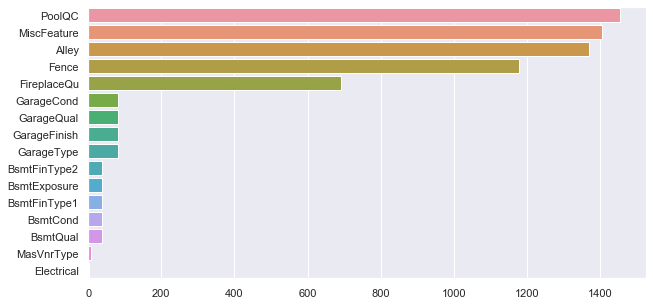

In [32]:
fig = plt.figure(figsize=(10,5))
train_null = train_data_c.isnull().sum()[train_data_c.isnull().sum() != 0].sort_values(ascending = False)
sns.barplot(y = train_null.index, x = train_null)

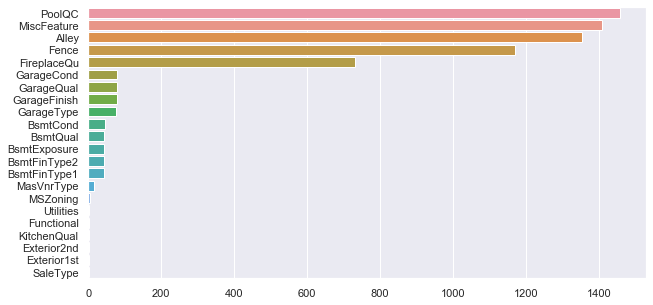

In [33]:
fig = plt.figure(figsize=(10,5))
test_null = test_data_c.isnull().sum()[test_data_c.isnull().sum() != 0].sort_values(ascending = False)
sns.barplot(y = test_null.index, x = test_null)

In [34]:
#Drop first 5 columns

train_data_c.dropna(thresh = len(train_data_c)*0.9, axis = 1, inplace = True)
test_data_c.dropna(thresh = len(test_data_c)*0.9, axis = 1, inplace = True)

print(len(train_data_c)*0.9)
print(len(test_data_c)*0.9)

1314.0
1313.1000000000001


In [35]:
train_data_c['Electrical'] = train_data_c['Electrical'].fillna(method='ffill')
test_data_c['SaleType'] = test_data_c['SaleType'].fillna(method='ffill')
test_data_c['KitchenQual'] = test_data_c['KitchenQual'].fillna(method='ffill')
test_data_c['Exterior1st'] = test_data_c['Exterior1st'].fillna(method='ffill')
test_data_c['Exterior2nd'] = test_data_c['Exterior2nd'].fillna(method='ffill')
test_data_c['Functional'] = test_data_c['Functional'].fillna(method='ffill')
test_data_c['Utilities'] = test_data_c['Utilities'].fillna(method='ffill')
test_data_c['MSZoning'] = test_data_c['MSZoning'].fillna(method='ffill')

In [36]:
# Categorical missing values
for col in train_data_c.columns:
    train_data_c[col] = train_data_c[col].fillna("None")
for col in test_data_c.columns:
    test_data_c[col] = test_data_c[col].fillna("None")

In [37]:
print("Train null values : ",len(train_data_c.isnull().sum()[train_data_c.isnull().sum()!=0]))
print("Test null values : ",len(test_data_c.isnull().sum()[test_data_c.isnull().sum()!=0]))

Train null values :  0
Test null values :  0


In [38]:
print(train_data_c.shape)
print(test_data_c.shape)

(1460, 38)
(1459, 38)


In [39]:
num_train = train_data_n[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
                          'BedroomAbvGr','Fireplaces','MoSold','YrSold']]

num_test = test_data_n[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
                        'BedroomAbvGr','Fireplaces','MoSold','YrSold']]

print(num_train.shape)
print(num_test.shape)
numerical_categorical_feature=c = pd.concat((num_train,num_test),sort=False)
print(numerical_categorical_feature.shape)
numerical_categorical_feature=numerical_categorical_feature.astype('O')


(1451, 10)
(1459, 10)
(2910, 10)


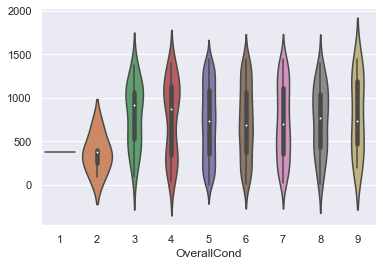

In [40]:
sns.violinplot(x=num_train['OverallCond'],y=num_train['OverallCond'].index)

In [41]:
numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
num_train_dummy=numerical_categorical_feature[:1451]
num_test_dummy=numerical_categorical_feature[1451:].reset_index(drop=True)
print(num_train_dummy.shape)
print(num_test_dummy.shape)

(1451, 58)
(1459, 58)


In [42]:
c = pd.concat((train_data_c, test_data_c), sort=False).reset_index(drop=True)

In [43]:
c1 = pd.get_dummies(c)

In [44]:
final_train_c = c1.iloc[:train_data_c.shape[0]]
final_train_c = final_train_c.reset_index(drop=True)
final_train_c.shape

(1460, 243)

In [45]:
final_test_c = c1.iloc[train_data_c.shape[0]:]
final_test_c = final_test_c.reset_index(drop=True)
final_test_c.shape

(1459, 243)

In [46]:
final_train_c = final_train_c.merge(num_train_dummy,left_index=True,right_index=True)
final_test_c = final_test_c.merge(num_test_dummy,left_index=True,right_index=True)

In [47]:
#Merging Numerical and categorical data

x_train = final_train_n.merge(final_train_c, left_index=True, right_index=True).reset_index(drop=True)
x_test = final_test_n.merge(final_test_c, left_index=True, right_index=True).reset_index(drop=True)

In [48]:
print(x_train.shape)
print(x_test.shape)

(1451, 313)
(1459, 313)


In [49]:
y_train = Train_Y_n

from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(x_train, y_train, test_size = 0.3)

In [50]:
# Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)


The best value of Alpha is:  {'alpha': 1}


In [51]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

Root Mean Square Error train = 26737.965843679154
Root Mean Square Error test = 25289.929162569504


In [186]:
#Lasso

from sklearn.linear_model import Lasso

Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)


C:\Users\Abhishek\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18834392706.56488, tolerance: 494857642.7934102
  positive)


KeyboardInterrupt: 

In [181]:
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(x_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

Root Mean Square Error train = 25658.57377915062
Root Mean Square Error test = 27284.618172172697


C:\Users\Abhishek\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214947682391.04834, tolerance: 834789765.060898
  positive)


In [182]:
y_test=ridge_mod.predict(x_test)

In [184]:
sample=pd.read_csv('test.csv')
submission=pd.DataFrame({"Id":sample['Id'],
                         "SalePrice":y_test})
submission.to_csv('submission.csv',index=False)

In [3]:
import numpy as np
np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])